# Force Small Weights With Weight Constraints

Weight regularization methods like weight decay introduce a penalty to the loss function when training a neural network to encourage the network to use small weights. Smaller weights in a neural network can result in a more stable model and less likely to overfit the training dataset, resulting in better performance when making a prediction on new data. Unlike weight regularization, a weight constraint is a trigger that checks the size or magnitude of the weights and scales them so that they are all below a predefined threshold. The constraint forces weights to be small and can be used instead of weight decay and in conjunction with more aggressive network configurations, such as very large learning rates. In this tutorial, you will discover the use of weight constraint regularization as an alternative to weight penalties to reduce overfitting in deep neural networks. After reading this tutorial, you will know:

* Weight penalties encourage but do not require neural networks to have small weights.
* Weight constraints, such as the L2 norm and maximum norm, can be used to force neural networks to have small weights during training.
* Weight constraints can improve generalization when used in conjunction with other regularization methods like dropout.

## Weight Constraints

In this section, you will discover the problem with neural networks that have large weights, a technique that you can use to force the development of models with small weights called weight constraints, and tips for using this technique in your projects.

### Alternative to Penalties for Large Weights

Large weights in a neural network are a sign of overfitting. A network with large weights has very likely learned the statistical noise in the training data. This results in a model that is unstable and very sensitive to changes to the input variables. In turn, the overfit network has poor performance when making predictions on new unseen data. A popular and effective technique to address the problem is to update the loss function optimized during training to take the size of the weights into account.

This is called a penalty, as the larger the network's weights become, the more the network is penalized, resulting in a larger loss and, in turn, larger updates. The effect is that the penalty encourages weights to be small or no larger than required during the training process, reducing overfitting. A problem in using a penalty is that although it does encourage the network toward smaller weights, it does not force smaller weights. A neural network trained with a weight regularization penalty may still allow large weights, in some cases very large weights.

### Force Small Weights

An alternate solution to using a penalty for the size of network weights is to use a weight constraint. A weight constraint is an update to the network that checks the size of the weights (e.g., their vector norm), and if the size exceeds a predefined limit, the weights are rescaled so that their size is below the limit or between a range. You can think of a weight constraint as an if-then rule checking the size of the weights while the network is being trained and only coming into effect and making weights small when required. Note, for efficiency, it does not have to be implemented as an if-then rule and often is not.

Unlike adding a penalty to the loss function, a weight constraint ensures the network weights are small, instead of merely encouraging them to be small. It can be useful for those problems or networks that resist other regularization methods, such as weight penalties. Weight constraints prove especially useful when you have configured your network to use alternative regularization methods to weight regularization and yet still desire the network to have small weights to reduce overfitting. One often-cited example is the use of a weight constraint regularization with dropout regularization.

### How to Use a Weight Constraint

A constraint is enforced on each node within a layer. All nodes within the layer use the same constraint, and often multiple hidden layers within the same network will use the same constraint. Recall that when we talk about the vector norm in general, this is the magnitude of the vector of weights in a node, and by default, is calculated as the L2 norm, e.g., the square root of the sum of the squared values in the vector. Some examples of constraints that could be used include:

* Force the vector norm to be 1.0 (e.g., the unit norm).
* Limit the maximum size of the vector norm (e.g., the maximum norm).
* Limit the minimum and maximum size of the vector norm (e.g., the min-max norm).

The maximum norm, also called max-norm or max norm, is a popular constraint because it is less aggressive than other norms such as the unit norm, simply setting an upper bound. When using a limit or a range, a hyperparameter must be specified. Given that weights are small, the hyperparameter is often a small integer value, such as a value between 1 and 4. If the norm exceeds the specified range or limit, the weights are rescaled or normalized such that their magnitude is below the specified parameter or within the specified range. The constraint can be applied after each update to the weights, e.g., at the end of each
minibatch.

### Tips for Using Weight Constraints

This section provides some tips for using weight constraints with your neural network.

**Use With All Network Types**

Weight constraints are a generic approach. They can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks. In LSTMs, it may be desirable to use different constraints or constraint configurations for the input and recurrent connections.

**Standardize Input Data**

It is a good general practice to rescale input variables to have the same scale. When input variables have different scales, the scale of the network's weights will, in turn, vary accordingly. This introduces a problem when using weight constraints because large weights will cause the constraint to trigger more frequently. This problem can be done by either normalization or standardization of input variables.

**Use a Larger Learning Rate**

The use of a weight constraint allows you to be more aggressive during the training of the network. Specifically, a larger learning rate can be used, enabling the network to, in turn, make larger updates to the weights with each update. This is cited as an important benefit to using weight constraints. Such as the use of a constraint in conjunction with dropout

**Try Other Constraints**

Explore the use of other weight constraints, such as a minimum and maximum range, non-negative weights, and more. You may also choose to use constraints on some weights and not others, such as not using constraints on bias weights in an MLP or not using constraints on recurrent connections in an LSTM.

## Weight Constraints Case Study

In this section, we will demonstrate how to use weight constraints to reduce the overfitting of an MLP on a simple binary classification problem.   This example provides a template for applying weight constraints to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two semi-circles of observations: one semi-circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `moons` dataset because of the shape of the observations in each class when plotted. We can use the `make_moons()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

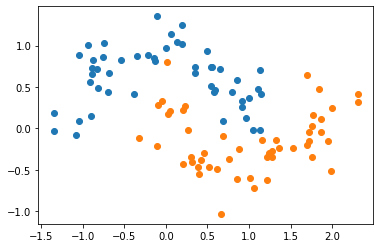

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the semi-circle or moon shape of the observations in each class. We can see the noise in the dispersal of the points, making the moons less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 844ms/step - loss: 0.7144 - accuracy: 0.1667 - val_loss: 0.6951 - val_accuracy: 0.6571
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6976 - accuracy: 0.5667 - val_loss: 0.6841 - val_accuracy: 0.6714
Epoch 3/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6812 - accuracy: 0.8667 - val_loss: 0.6735 - val_accuracy: 0.7286
Epoch 4/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6653 - accuracy: 0.9000 - val_loss: 0.6632 - val_accuracy: 0.7286
Epoch 5/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6498 - accuracy: 0.9000 - val_loss: 0.6533 - val_accuracy: 0.7286
Epoch 6/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6348 - accuracy: 0.9000 - val_loss: 0.6438 - val_accuracy: 0.7143
Epoch 7/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6202 - accuracy: 0.9000 - val_loss: 0.6346 - val_accuracy: 0.7143
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2414 - accuracy: 0.9000 - val_loss: 0.4485 - val_accuracy: 0.7286
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2390 - accuracy: 0.9000 - val_loss: 0.4478 - val_accuracy: 0.7286
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2366 - accuracy: 0.9000 - val_loss: 0.4471 - val_accuracy: 0.7286
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2342 - accuracy: 0.9000 - val_loss: 0.4464 - val_accuracy: 0.7429
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2320 - accuracy: 0.9000 - val_loss: 0.4458 - val_accuracy: 0.7429
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2299 - accuracy: 0.9000 - val_loss: 0.4451 - val_accuracy: 0.7429
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2278 - accuracy: 0.9000 - val_loss: 0.4445 - val_accuracy: 0.7429
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.1770 - accuracy: 0.9333 - val_loss: 0.4138 - val_accuracy: 0.8000
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1765 - accuracy: 0.9333 - val_loss: 0.4131 - val_accuracy: 0.8000
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1759 - accuracy: 0.9333 - val_loss: 0.4124 - val_accuracy: 0.8000
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1754 - accuracy: 0.9333 - val_loss: 0.4116 - val_accuracy: 0.8000
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1748 - accuracy: 0.9333 - val_loss: 0.4109 - val_accuracy: 0.8000
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1743 - accuracy: 0.9333 - val_loss: 0.4102 - val_accuracy: 0.8000
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1738 - accuracy: 0.9333 - val_loss: 0.4094 - val_accuracy: 0.8143
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1538 - accuracy: 0.9667 - val_loss: 0.3801 - val_accuracy: 0.8286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.3797 - val_accuracy: 0.8286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.3794 - val_accuracy: 0.8286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1529 - accuracy: 0.9667 - val_loss: 0.3790 - val_accuracy: 0.8286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1526 - accuracy: 0.9667 - val_loss: 0.3787 - val_accuracy: 0.8286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1523 - accuracy: 0.9667 - val_loss: 0.3784 - val_accuracy: 0.8286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1521 - accuracy: 0.9667 - val_loss: 0.3781 - val_accuracy: 0.8286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1418 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1417 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1416 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1414 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1413 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1412 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1410 - accuracy: 0.9667 - val_loss: 0.3697 - val_accuracy: 0.8143
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1355 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1354 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1353 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1352 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1350 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1349 - accuracy: 0.9667 - val_loss: 0.3689 - val_accuracy: 0.8429
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1295 - accuracy: 0.9667 - val_loss: 0.3645 - val_accuracy: 0.8429
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1294 - accuracy: 0.9667 - val_loss: 0.3644 - val_accuracy: 0.8429
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1293 - accuracy: 0.9667 - val_loss: 0.3643 - val_accuracy: 0.8429
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1292 - accuracy: 0.9667 - val_loss: 0.3642 - val_accuracy: 0.8429
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1290 - accuracy: 0.9667 - val_loss: 0.3640 - val_accuracy: 0.8429
Epoch 349/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 0.3639 - val_accuracy: 0.8429
Epoch 350/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.1288 - accuracy: 0.9667 - val_loss: 0.3639 - val_accuracy: 0.8429
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1221 - accuracy: 0.9667 - val_loss: 0.3560 - val_accuracy: 0.8429
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1220 - accuracy: 0.9667 - val_loss: 0.3558 - val_accuracy: 0.8429
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1218 - accuracy: 0.9667 - val_loss: 0.3556 - val_accuracy: 0.8429
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1217 - accuracy: 0.9667 - val_loss: 0.3554 - val_accuracy: 0.8429
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1215 - accuracy: 0.9667 - val_loss: 0.3552 - val_accuracy: 0.8429
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1214 - accuracy: 0.9667 - val_loss: 0.3550 - val_accuracy: 0.8429
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1212 - accuracy: 0.9667 - val_loss: 0.3548 - val_accuracy: 0.8429
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.3404 - val_accuracy: 0.8429
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 0.3400 - val_accuracy: 0.8429
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 0.3397 - val_accuracy: 0.8429
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 0.3393 - val_accuracy: 0.8429
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1119 - accuracy: 0.9667 - val_loss: 0.3388 - val_accuracy: 0.8429
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1117 - accuracy: 0.9667 - val_loss: 0.3383 - val_accuracy: 0.8429
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1115 - accuracy: 0.9667 - val_loss: 0.3378 - val_accuracy: 0.8429
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 0.3176 - val_accuracy: 0.8429
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0998 - accuracy: 0.9667 - val_loss: 0.3172 - val_accuracy: 0.8429
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0995 - accuracy: 0.9667 - val_loss: 0.3167 - val_accuracy: 0.8429
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0993 - accuracy: 0.9667 - val_loss: 0.3162 - val_accuracy: 0.8429
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0990 - accuracy: 0.9667 - val_loss: 0.3158 - val_accuracy: 0.8429
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0988 - accuracy: 0.9667 - val_loss: 0.3154 - val_accuracy: 0.8429
Epoch 521/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0985 - accuracy: 0.9667 - val_loss: 0.3150 - val_accuracy: 0.8429
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0849 - accuracy: 0.9667 - val_loss: 0.2898 - val_accuracy: 0.8857
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0846 - accuracy: 0.9667 - val_loss: 0.2894 - val_accuracy: 0.8857
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 0.2888 - val_accuracy: 0.8857
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0840 - accuracy: 0.9667 - val_loss: 0.2882 - val_accuracy: 0.8857
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0837 - accuracy: 0.9667 - val_loss: 0.2877 - val_accuracy: 0.8857
Epoch 577/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0834 - accuracy: 0.9667 - val_loss: 0.2872 - val_accuracy: 0.8857
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0832 - accuracy: 0.9667 - val_loss: 0.2868 - val_accuracy: 0.8857
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0688 - accuracy: 0.9667 - val_loss: 0.2631 - val_accuracy: 0.9143
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0686 - accuracy: 0.9667 - val_loss: 0.2627 - val_accuracy: 0.9143
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0683 - accuracy: 0.9667 - val_loss: 0.2623 - val_accuracy: 0.9143
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0680 - accuracy: 0.9667 - val_loss: 0.2619 - val_accuracy: 0.9143
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0677 - accuracy: 0.9667 - val_loss: 0.2615 - val_accuracy: 0.9143
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0675 - accuracy: 0.9667 - val_loss: 0.2611 - val_accuracy: 0.9286
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0672 - accuracy: 0.9667 - val_loss: 0.2607 - val_accuracy: 0.9286
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0541 - accuracy: 0.9667 - val_loss: 0.2460 - val_accuracy: 0.9286
Epoch 687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0538 - accuracy: 0.9667 - val_loss: 0.2458 - val_accuracy: 0.9286
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0536 - accuracy: 0.9667 - val_loss: 0.2455 - val_accuracy: 0.9286
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0534 - accuracy: 0.9667 - val_loss: 0.2453 - val_accuracy: 0.9286
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 0.9667 - val_loss: 0.2452 - val_accuracy: 0.9286
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0529 - accuracy: 0.9667 - val_loss: 0.2450 - val_accuracy: 0.9286
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0526 - accuracy: 0.9667 - val_loss: 0.2448 - val_accuracy: 0.9286
Epoch 693/4000

1/1 [==============================] - 0s 25ms/step - loss: 0.0421 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9286
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9286
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 0.2354 - val_accuracy: 0.9286
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.2354 - val_accuracy: 0.9286
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 0.2353 - val_accuracy: 0.9286
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 0.2352 - val_accuracy: 0.9286
Epoch 749/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 0.2351 - val_accuracy: 0.9286
Epoch 750/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.2322 - val_accuracy: 0.9286
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 802/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 803/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 804/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 805/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 806/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9286
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 0.9286
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9286
Epoch 860/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9286
Epoch 861/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9286
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.9286
Epoch 863/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.9429
Epoch 864/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.2400 - val_accuracy: 0.9429
Epoch 915/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9429
Epoch 916/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.2402 - val_accuracy: 0.9429
Epoch 917/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9429
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.2405 - val_accuracy: 0.9429
Epoch 919/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.9429
Epoch 920/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.2407 - val_accuracy: 0.9429
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2477 - val_accuracy: 0.9429
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.2478 - val_accuracy: 0.9429
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.2480 - val_accuracy: 0.9429
Epoch 974/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.2481 - val_accuracy: 0.9429
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9429
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.2484 - val_accuracy: 0.9429
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2486 - val_accuracy: 0.9429
Epoch 978/4000

1/1 [==============================] - 0s 23ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.2565 - val_accuracy: 0.9429
Epoch 1029/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 0.9429
Epoch 1030/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2568 - val_accuracy: 0.9429
Epoch 1031/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2570 - val_accuracy: 0.9429
Epoch 1032/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.2571 - val_accuracy: 0.9429
Epoch 1033/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.2573 - val_accuracy: 0.9429
Epoch 1034/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.2574 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.2645 - val_accuracy: 0.9429
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2647 - val_accuracy: 0.9429
Epoch 1087/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2648 - val_accuracy: 0.9429
Epoch 1088/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9429
Epoch 1089/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.2651 - val_accuracy: 0.9429
Epoch 1090/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.2653 - val_accuracy: 0.9429
Epoch 1091/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.2654 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 23ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9429
Epoch 1143/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2726 - val_accuracy: 0.9429
Epoch 1144/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2728 - val_accuracy: 0.9429
Epoch 1145/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2729 - val_accuracy: 0.9429
Epoch 1146/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2731 - val_accuracy: 0.9429
Epoch 1147/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9429
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2734 - val_accuracy: 0.9429
Epoch 11

1/1 [==============================] - 0s 23ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2807 - val_accuracy: 0.9429
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2808 - val_accuracy: 0.9429
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2810 - val_accuracy: 0.9429
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9429
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.2812 - val_accuracy: 0.9429
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9429
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.2815 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2883 - val_accuracy: 0.9429
Epoch 1257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2885 - val_accuracy: 0.9429
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2886 - val_accuracy: 0.9429
Epoch 1259/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.2887 - val_accuracy: 0.9429
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9429
Epoch 1261/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2890 - val_accuracy: 0.9429
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2891 - val_accuracy: 0.9429
Epoch 12

1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2958 - val_accuracy: 0.9429
Epoch 1314/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy: 0.9429
Epoch 1315/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2961 - val_accuracy: 0.9429
Epoch 1316/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2962 - val_accuracy: 0.9429
Epoch 1317/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2963 - val_accuracy: 0.9429
Epoch 1318/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9429
Epoch 1319/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2966 - val_accuracy: 0.9429
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3033 - val_accuracy: 0.9286
Epoch 1371/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3034 - val_accuracy: 0.9286
Epoch 1372/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3035 - val_accuracy: 0.9286
Epoch 1373/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3036 - val_accuracy: 0.9286
Epoch 1374/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.9286
Epoch 1375/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3039 - val_accuracy: 0.9286
Epoch 1376/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9286
Epoch 13

1/1 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3103 - val_accuracy: 0.9286
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3105 - val_accuracy: 0.9286
Epoch 1429/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3106 - val_accuracy: 0.9286
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3107 - val_accuracy: 0.9286
Epoch 1431/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3108 - val_accuracy: 0.9286
Epoch 1432/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3109 - val_accuracy: 0.9286
Epoch 1433/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3110 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.9286
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3172 - val_accuracy: 0.9286
Epoch 1486/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.9286
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.9286
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3176 - val_accuracy: 0.9286
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.9286
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3178 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3234 - val_accuracy: 0.9286
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3235 - val_accuracy: 0.9286
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3236 - val_accuracy: 0.9286
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3237 - val_accuracy: 0.9286
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 0.9286
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3239 - val_accuracy: 0.9286
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3240 - val_accuracy: 0.9286
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3295 - val_accuracy: 0.9286
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3296 - val_accuracy: 0.9286
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3297 - val_accuracy: 0.9286
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3298 - val_accuracy: 0.9286
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3299 - val_accuracy: 0.9286
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3300 - val_accuracy: 0.9286
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3301 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.9286
Epoch 1656/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3356 - val_accuracy: 0.9286
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3357 - val_accuracy: 0.9286
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3358 - val_accuracy: 0.9286
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3359 - val_accuracy: 0.9286
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9286
Epoch 1661/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3361 - val_accuracy: 0.9286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3412 - val_accuracy: 0.9286
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9286
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 0.9286
Epoch 1715/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3415 - val_accuracy: 0.9286
Epoch 1716/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3416 - val_accuracy: 0.9286
Epoch 1717/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3417 - val_accuracy: 0.9286
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3418 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3468 - val_accuracy: 0.9286
Epoch 1770/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.9286
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3470 - val_accuracy: 0.9286
Epoch 1772/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3470 - val_accuracy: 0.9286
Epoch 1773/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3471 - val_accuracy: 0.9286
Epoch 1774/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3472 - val_accuracy: 0.9286
Epoch 1775/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3474 - val_accuracy: 0.9286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3520 - val_accuracy: 0.9286
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.9286
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3522 - val_accuracy: 0.9286
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3523 - val_accuracy: 0.9286
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3524 - val_accuracy: 0.9286
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3525 - val_accuracy: 0.9286
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3526 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3572 - val_accuracy: 0.9286
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.9286
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3574 - val_accuracy: 0.9286
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.9286
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3576 - val_accuracy: 0.9286
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3577 - val_accuracy: 0.9286
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3578 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3624 - val_accuracy: 0.9286
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3625 - val_accuracy: 0.9286
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3626 - val_accuracy: 0.9286
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.9286
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.9286
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.9286
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3629 - val_accuracy: 0.9286
Epoch 19

1/1 [==============================] - 0s 23ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3674 - val_accuracy: 0.9286
Epoch 1998/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3675 - val_accuracy: 0.9286
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3675 - val_accuracy: 0.9286
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3676 - val_accuracy: 0.9286
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3677 - val_accuracy: 0.9286
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3678 - val_accuracy: 0.9286
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3679 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3723 - val_accuracy: 0.9286
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3723 - val_accuracy: 0.9286
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3724 - val_accuracy: 0.9286
Epoch 2057/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3725 - val_accuracy: 0.9286
Epoch 2058/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3726 - val_accuracy: 0.9286
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3727 - val_accuracy: 0.9286
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3727 - val_accuracy: 0.9286
Epoch 20

1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3770 - val_accuracy: 0.9286
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3771 - val_accuracy: 0.9286
Epoch 2113/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3772 - val_accuracy: 0.9286
Epoch 2114/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3772 - val_accuracy: 0.9286
Epoch 2115/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3773 - val_accuracy: 0.9286
Epoch 2116/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3774 - val_accuracy: 0.9286
Epoch 2117/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3775 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3815 - val_accuracy: 0.9286
Epoch 2169/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3816 - val_accuracy: 0.9286
Epoch 2170/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3816 - val_accuracy: 0.9286
Epoch 2171/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3817 - val_accuracy: 0.9286
Epoch 2172/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3818 - val_accuracy: 0.9286
Epoch 2173/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3819 - val_accuracy: 0.9286
Epoch 2174/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3819 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3859 - val_accuracy: 0.9286
Epoch 2226/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3860 - val_accuracy: 0.9286
Epoch 2227/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3860 - val_accuracy: 0.9286
Epoch 2228/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3861 - val_accuracy: 0.9286
Epoch 2229/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3862 - val_accuracy: 0.9286
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3863 - val_accuracy: 0.9286
Epoch 2231/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3863 - val_accuracy: 0.9286
Epoch 22

1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3902 - val_accuracy: 0.9286
Epoch 2283/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3903 - val_accuracy: 0.9286
Epoch 2284/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3903 - val_accuracy: 0.9286
Epoch 2285/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3904 - val_accuracy: 0.9286
Epoch 2286/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3905 - val_accuracy: 0.9286
Epoch 2287/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3905 - val_accuracy: 0.9286
Epoch 2288/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3906 - val_accuracy: 0.9286
Epoch 22

Epoch 2339/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.9778e-04 - accuracy: 1.0000 - val_loss: 0.3944 - val_accuracy: 0.9286
Epoch 2340/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.9656e-04 - accuracy: 1.0000 - val_loss: 0.3945 - val_accuracy: 0.9286
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.9528e-04 - accuracy: 1.0000 - val_loss: 0.3946 - val_accuracy: 0.9286
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.9406e-04 - accuracy: 1.0000 - val_loss: 0.3947 - val_accuracy: 0.9286
Epoch 2343/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.9287e-04 - accuracy: 1.0000 - val_loss: 0.3947 - val_accuracy: 0.9286
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.9170e-04 - accuracy: 1.0000 - val_loss: 0.3948 - val_accuracy: 0.9286
Epoch 2345/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.9046e-04 - accuracy: 1.0000 - val_

1/1 [==============================] - 0s 22ms/step - loss: 9.3299e-04 - accuracy: 1.0000 - val_loss: 0.3985 - val_accuracy: 0.9286
Epoch 2395/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.3187e-04 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9286
Epoch 2396/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.3072e-04 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9286
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.2962e-04 - accuracy: 1.0000 - val_loss: 0.3987 - val_accuracy: 0.9286
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.2848e-04 - accuracy: 1.0000 - val_loss: 0.3987 - val_accuracy: 0.9286
Epoch 2399/4000
1/1 [==============================] - 0s 23ms/step - loss: 9.2741e-04 - accuracy: 1.0000 - val_loss: 0.3988 - val_accuracy: 0.9286
Epoch 2400/4000
1/1 [==============================] - 0s 22ms/step - loss: 9.2633e-04 - accuracy: 1.0000 - val_loss: 0.3989 - v

1/1 [==============================] - 0s 23ms/step - loss: 8.7376e-04 - accuracy: 1.0000 - val_loss: 0.4024 - val_accuracy: 0.9286
Epoch 2450/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.7270e-04 - accuracy: 1.0000 - val_loss: 0.4025 - val_accuracy: 0.9286
Epoch 2451/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.7166e-04 - accuracy: 1.0000 - val_loss: 0.4026 - val_accuracy: 0.9286
Epoch 2452/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.7064e-04 - accuracy: 1.0000 - val_loss: 0.4026 - val_accuracy: 0.9286
Epoch 2453/4000
1/1 [==============================] - 0s 24ms/step - loss: 8.6960e-04 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.9286
Epoch 2454/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.6858e-04 - accuracy: 1.0000 - val_loss: 0.4028 - val_accuracy: 0.9286
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.6756e-04 - accuracy: 1.0000 - val_loss: 0.4028 - v

1/1 [==============================] - 0s 23ms/step - loss: 8.1945e-04 - accuracy: 1.0000 - val_loss: 0.4063 - val_accuracy: 0.9143
Epoch 2505/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.1850e-04 - accuracy: 1.0000 - val_loss: 0.4063 - val_accuracy: 0.9143
Epoch 2506/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.1752e-04 - accuracy: 1.0000 - val_loss: 0.4064 - val_accuracy: 0.9143
Epoch 2507/4000
1/1 [==============================] - 0s 22ms/step - loss: 8.1661e-04 - accuracy: 1.0000 - val_loss: 0.4065 - val_accuracy: 0.9143
Epoch 2508/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.1568e-04 - accuracy: 1.0000 - val_loss: 0.4065 - val_accuracy: 0.9143
Epoch 2509/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.1472e-04 - accuracy: 1.0000 - val_loss: 0.4066 - val_accuracy: 0.9143
Epoch 2510/4000
1/1 [==============================] - 0s 23ms/step - loss: 8.1375e-04 - accuracy: 1.0000 - val_loss: 0.4067 - v

1/1 [==============================] - 0s 23ms/step - loss: 7.6952e-04 - accuracy: 1.0000 - val_loss: 0.4100 - val_accuracy: 0.9143
Epoch 2560/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.6871e-04 - accuracy: 1.0000 - val_loss: 0.4101 - val_accuracy: 0.9143
Epoch 2561/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.6784e-04 - accuracy: 1.0000 - val_loss: 0.4102 - val_accuracy: 0.9143
Epoch 2562/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.6695e-04 - accuracy: 1.0000 - val_loss: 0.4102 - val_accuracy: 0.9143
Epoch 2563/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.6606e-04 - accuracy: 1.0000 - val_loss: 0.4103 - val_accuracy: 0.9143
Epoch 2564/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.6526e-04 - accuracy: 1.0000 - val_loss: 0.4104 - val_accuracy: 0.9143
Epoch 2565/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.6442e-04 - accuracy: 1.0000 - val_loss: 0.4104 - v

1/1 [==============================] - 0s 23ms/step - loss: 7.2365e-04 - accuracy: 1.0000 - val_loss: 0.4137 - val_accuracy: 0.9143
Epoch 2615/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.2288e-04 - accuracy: 1.0000 - val_loss: 0.4138 - val_accuracy: 0.9143
Epoch 2616/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.2210e-04 - accuracy: 1.0000 - val_loss: 0.4139 - val_accuracy: 0.9143
Epoch 2617/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.2129e-04 - accuracy: 1.0000 - val_loss: 0.4139 - val_accuracy: 0.9143
Epoch 2618/4000
1/1 [==============================] - 0s 23ms/step - loss: 7.2047e-04 - accuracy: 1.0000 - val_loss: 0.4140 - val_accuracy: 0.9143
Epoch 2619/4000
1/1 [==============================] - 0s 22ms/step - loss: 7.1971e-04 - accuracy: 1.0000 - val_loss: 0.4141 - val_accuracy: 0.9143
Epoch 2620/4000
1/1 [==============================] - 0s 87ms/step - loss: 7.1890e-04 - accuracy: 1.0000 - val_loss: 0.4141 - v

1/1 [==============================] - 0s 22ms/step - loss: 6.8136e-04 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.9143
Epoch 2670/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.8063e-04 - accuracy: 1.0000 - val_loss: 0.4174 - val_accuracy: 0.9143
Epoch 2671/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.7989e-04 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.9143
Epoch 2672/4000
1/1 [==============================] - 0s 87ms/step - loss: 6.7917e-04 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9143
Epoch 2673/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.7840e-04 - accuracy: 1.0000 - val_loss: 0.4176 - val_accuracy: 0.9143
Epoch 2674/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.7765e-04 - accuracy: 1.0000 - val_loss: 0.4177 - val_accuracy: 0.9143
Epoch 2675/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.7693e-04 - accuracy: 1.0000 - val_loss: 0.4178 - v

1/1 [==============================] - 0s 22ms/step - loss: 6.4223e-04 - accuracy: 1.0000 - val_loss: 0.4209 - val_accuracy: 0.9143
Epoch 2725/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.4154e-04 - accuracy: 1.0000 - val_loss: 0.4210 - val_accuracy: 0.9143
Epoch 2726/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.4085e-04 - accuracy: 1.0000 - val_loss: 0.4210 - val_accuracy: 0.9143
Epoch 2727/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.4018e-04 - accuracy: 1.0000 - val_loss: 0.4211 - val_accuracy: 0.9143
Epoch 2728/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.3951e-04 - accuracy: 1.0000 - val_loss: 0.4212 - val_accuracy: 0.9143
Epoch 2729/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.3884e-04 - accuracy: 1.0000 - val_loss: 0.4212 - val_accuracy: 0.9143
Epoch 2730/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.3816e-04 - accuracy: 1.0000 - val_loss: 0.4213 - v

1/1 [==============================] - 0s 22ms/step - loss: 6.0607e-04 - accuracy: 1.0000 - val_loss: 0.4244 - val_accuracy: 0.9143
Epoch 2780/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0545e-04 - accuracy: 1.0000 - val_loss: 0.4244 - val_accuracy: 0.9143
Epoch 2781/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0479e-04 - accuracy: 1.0000 - val_loss: 0.4245 - val_accuracy: 0.9143
Epoch 2782/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0416e-04 - accuracy: 1.0000 - val_loss: 0.4246 - val_accuracy: 0.9143
Epoch 2783/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0354e-04 - accuracy: 1.0000 - val_loss: 0.4246 - val_accuracy: 0.9143
Epoch 2784/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0290e-04 - accuracy: 1.0000 - val_loss: 0.4247 - val_accuracy: 0.9143
Epoch 2785/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.0227e-04 - accuracy: 1.0000 - val_loss: 0.4247 - v

1/1 [==============================] - 0s 22ms/step - loss: 5.7248e-04 - accuracy: 1.0000 - val_loss: 0.4278 - val_accuracy: 0.9143
Epoch 2835/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7190e-04 - accuracy: 1.0000 - val_loss: 0.4279 - val_accuracy: 0.9143
Epoch 2836/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7131e-04 - accuracy: 1.0000 - val_loss: 0.4279 - val_accuracy: 0.9143
Epoch 2837/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7070e-04 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9143
Epoch 2838/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.7011e-04 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9143
Epoch 2839/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.6956e-04 - accuracy: 1.0000 - val_loss: 0.4281 - val_accuracy: 0.9143
Epoch 2840/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.6897e-04 - accuracy: 1.0000 - val_loss: 0.4282 - v

1/1 [==============================] - 0s 22ms/step - loss: 5.4132e-04 - accuracy: 1.0000 - val_loss: 0.4312 - val_accuracy: 0.9143
Epoch 2890/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.4077e-04 - accuracy: 1.0000 - val_loss: 0.4313 - val_accuracy: 0.9143
Epoch 2891/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.4021e-04 - accuracy: 1.0000 - val_loss: 0.4313 - val_accuracy: 0.9143
Epoch 2892/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3965e-04 - accuracy: 1.0000 - val_loss: 0.4314 - val_accuracy: 0.9143
Epoch 2893/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3909e-04 - accuracy: 1.0000 - val_loss: 0.4314 - val_accuracy: 0.9143
Epoch 2894/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3855e-04 - accuracy: 1.0000 - val_loss: 0.4315 - val_accuracy: 0.9143
Epoch 2895/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.3803e-04 - accuracy: 1.0000 - val_loss: 0.4315 - v

1/1 [==============================] - 0s 23ms/step - loss: 5.1225e-04 - accuracy: 1.0000 - val_loss: 0.4345 - val_accuracy: 0.9143
Epoch 2945/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1174e-04 - accuracy: 1.0000 - val_loss: 0.4346 - val_accuracy: 0.9143
Epoch 2946/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1126e-04 - accuracy: 1.0000 - val_loss: 0.4346 - val_accuracy: 0.9143
Epoch 2947/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1073e-04 - accuracy: 1.0000 - val_loss: 0.4347 - val_accuracy: 0.9143
Epoch 2948/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.1022e-04 - accuracy: 1.0000 - val_loss: 0.4348 - val_accuracy: 0.9143
Epoch 2949/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.0971e-04 - accuracy: 1.0000 - val_loss: 0.4348 - val_accuracy: 0.9143
Epoch 2950/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.0922e-04 - accuracy: 1.0000 - val_loss: 0.4349 - v

1/1 [==============================] - 0s 23ms/step - loss: 4.8523e-04 - accuracy: 1.0000 - val_loss: 0.4378 - val_accuracy: 0.9143
Epoch 3000/4000
1/1 [==============================] - 0s 86ms/step - loss: 4.8478e-04 - accuracy: 1.0000 - val_loss: 0.4379 - val_accuracy: 0.9143
Epoch 3001/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.8430e-04 - accuracy: 1.0000 - val_loss: 0.4379 - val_accuracy: 0.9143
Epoch 3002/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.8382e-04 - accuracy: 1.0000 - val_loss: 0.4380 - val_accuracy: 0.9143
Epoch 3003/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8332e-04 - accuracy: 1.0000 - val_loss: 0.4380 - val_accuracy: 0.9143
Epoch 3004/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8286e-04 - accuracy: 1.0000 - val_loss: 0.4381 - val_accuracy: 0.9143
Epoch 3005/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.8241e-04 - accuracy: 1.0000 - val_loss: 0.4382 - v

1/1 [==============================] - 0s 86ms/step - loss: 4.5998e-04 - accuracy: 1.0000 - val_loss: 0.4411 - val_accuracy: 0.9143
Epoch 3055/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5955e-04 - accuracy: 1.0000 - val_loss: 0.4411 - val_accuracy: 0.9143
Epoch 3056/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5911e-04 - accuracy: 1.0000 - val_loss: 0.4412 - val_accuracy: 0.9143
Epoch 3057/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5864e-04 - accuracy: 1.0000 - val_loss: 0.4412 - val_accuracy: 0.9143
Epoch 3058/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5821e-04 - accuracy: 1.0000 - val_loss: 0.4413 - val_accuracy: 0.9143
Epoch 3059/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.5777e-04 - accuracy: 1.0000 - val_loss: 0.4414 - val_accuracy: 0.9143
Epoch 3060/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.5735e-04 - accuracy: 1.0000 - val_loss: 0.4414 - v

1/1 [==============================] - 0s 22ms/step - loss: 4.3643e-04 - accuracy: 1.0000 - val_loss: 0.4442 - val_accuracy: 0.9143
Epoch 3110/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.3601e-04 - accuracy: 1.0000 - val_loss: 0.4443 - val_accuracy: 0.9143
Epoch 3111/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3559e-04 - accuracy: 1.0000 - val_loss: 0.4444 - val_accuracy: 0.9143
Epoch 3112/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.3518e-04 - accuracy: 1.0000 - val_loss: 0.4444 - val_accuracy: 0.9143
Epoch 3113/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.3479e-04 - accuracy: 1.0000 - val_loss: 0.4445 - val_accuracy: 0.9143
Epoch 3114/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.3438e-04 - accuracy: 1.0000 - val_loss: 0.4445 - val_accuracy: 0.9143
Epoch 3115/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.3395e-04 - accuracy: 1.0000 - val_loss: 0.4446 - v

1/1 [==============================] - 0s 23ms/step - loss: 4.1438e-04 - accuracy: 1.0000 - val_loss: 0.4474 - val_accuracy: 0.9143
Epoch 3165/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.1400e-04 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9143
Epoch 3166/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.1362e-04 - accuracy: 1.0000 - val_loss: 0.4475 - val_accuracy: 0.9143
Epoch 3167/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.1321e-04 - accuracy: 1.0000 - val_loss: 0.4476 - val_accuracy: 0.9143
Epoch 3168/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.1280e-04 - accuracy: 1.0000 - val_loss: 0.4476 - val_accuracy: 0.9143
Epoch 3169/4000
1/1 [==============================] - 0s 23ms/step - loss: 4.1245e-04 - accuracy: 1.0000 - val_loss: 0.4477 - val_accuracy: 0.9143
Epoch 3170/4000
1/1 [==============================] - 0s 22ms/step - loss: 4.1208e-04 - accuracy: 1.0000 - val_loss: 0.4478 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.9372e-04 - accuracy: 1.0000 - val_loss: 0.4505 - val_accuracy: 0.9143
Epoch 3220/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9337e-04 - accuracy: 1.0000 - val_loss: 0.4506 - val_accuracy: 0.9143
Epoch 3221/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.9300e-04 - accuracy: 1.0000 - val_loss: 0.4506 - val_accuracy: 0.9143
Epoch 3222/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.9265e-04 - accuracy: 1.0000 - val_loss: 0.4507 - val_accuracy: 0.9143
Epoch 3223/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.9229e-04 - accuracy: 1.0000 - val_loss: 0.4507 - val_accuracy: 0.9143
Epoch 3224/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.9193e-04 - accuracy: 1.0000 - val_loss: 0.4508 - val_accuracy: 0.9143
Epoch 3225/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.9157e-04 - accuracy: 1.0000 - val_loss: 0.4508 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.7435e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9143
Epoch 3275/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7401e-04 - accuracy: 1.0000 - val_loss: 0.4537 - val_accuracy: 0.9143
Epoch 3276/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7368e-04 - accuracy: 1.0000 - val_loss: 0.4537 - val_accuracy: 0.9143
Epoch 3277/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7334e-04 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9143
Epoch 3278/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7299e-04 - accuracy: 1.0000 - val_loss: 0.4538 - val_accuracy: 0.9143
Epoch 3279/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.7265e-04 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.9143
Epoch 3280/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.7232e-04 - accuracy: 1.0000 - val_loss: 0.4539 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.5617e-04 - accuracy: 1.0000 - val_loss: 0.4567 - val_accuracy: 0.9143
Epoch 3330/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5584e-04 - accuracy: 1.0000 - val_loss: 0.4567 - val_accuracy: 0.9143
Epoch 3331/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5554e-04 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.9143
Epoch 3332/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5521e-04 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.9143
Epoch 3333/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5489e-04 - accuracy: 1.0000 - val_loss: 0.4569 - val_accuracy: 0.9143
Epoch 3334/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5457e-04 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.9143
Epoch 3335/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.5426e-04 - accuracy: 1.0000 - val_loss: 0.4570 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.3908e-04 - accuracy: 1.0000 - val_loss: 0.4597 - val_accuracy: 0.9143
Epoch 3385/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.3878e-04 - accuracy: 1.0000 - val_loss: 0.4597 - val_accuracy: 0.9143
Epoch 3386/4000
1/1 [==============================] - 0s 24ms/step - loss: 3.3847e-04 - accuracy: 1.0000 - val_loss: 0.4598 - val_accuracy: 0.9143
Epoch 3387/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3817e-04 - accuracy: 1.0000 - val_loss: 0.4599 - val_accuracy: 0.9143
Epoch 3388/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3788e-04 - accuracy: 1.0000 - val_loss: 0.4599 - val_accuracy: 0.9143
Epoch 3389/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3759e-04 - accuracy: 1.0000 - val_loss: 0.4600 - val_accuracy: 0.9143
Epoch 3390/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.3729e-04 - accuracy: 1.0000 - val_loss: 0.4600 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.2301e-04 - accuracy: 1.0000 - val_loss: 0.4627 - val_accuracy: 0.9143
Epoch 3440/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2271e-04 - accuracy: 1.0000 - val_loss: 0.4627 - val_accuracy: 0.9143
Epoch 3441/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2242e-04 - accuracy: 1.0000 - val_loss: 0.4628 - val_accuracy: 0.9143
Epoch 3442/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.2214e-04 - accuracy: 1.0000 - val_loss: 0.4629 - val_accuracy: 0.9143
Epoch 3443/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2187e-04 - accuracy: 1.0000 - val_loss: 0.4629 - val_accuracy: 0.9143
Epoch 3444/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2159e-04 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.9143
Epoch 3445/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.2130e-04 - accuracy: 1.0000 - val_loss: 0.4630 - v

1/1 [==============================] - 0s 23ms/step - loss: 3.0786e-04 - accuracy: 1.0000 - val_loss: 0.4657 - val_accuracy: 0.9143
Epoch 3495/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0760e-04 - accuracy: 1.0000 - val_loss: 0.4657 - val_accuracy: 0.9143
Epoch 3496/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0733e-04 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.9143
Epoch 3497/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0707e-04 - accuracy: 1.0000 - val_loss: 0.4658 - val_accuracy: 0.9143
Epoch 3498/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0680e-04 - accuracy: 1.0000 - val_loss: 0.4659 - val_accuracy: 0.9143
Epoch 3499/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0653e-04 - accuracy: 1.0000 - val_loss: 0.4659 - val_accuracy: 0.9143
Epoch 3500/4000
1/1 [==============================] - 0s 23ms/step - loss: 3.0627e-04 - accuracy: 1.0000 - val_loss: 0.4660 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.9361e-04 - accuracy: 1.0000 - val_loss: 0.4686 - val_accuracy: 0.9143
Epoch 3550/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9336e-04 - accuracy: 1.0000 - val_loss: 0.4686 - val_accuracy: 0.9143
Epoch 3551/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9310e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.9143
Epoch 3552/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.9284e-04 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.9143
Epoch 3553/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9259e-04 - accuracy: 1.0000 - val_loss: 0.4688 - val_accuracy: 0.9143
Epoch 3554/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9234e-04 - accuracy: 1.0000 - val_loss: 0.4688 - val_accuracy: 0.9143
Epoch 3555/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.9211e-04 - accuracy: 1.0000 - val_loss: 0.4689 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.8015e-04 - accuracy: 1.0000 - val_loss: 0.4714 - val_accuracy: 0.9143
Epoch 3605/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7991e-04 - accuracy: 1.0000 - val_loss: 0.4715 - val_accuracy: 0.9143
Epoch 3606/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7969e-04 - accuracy: 1.0000 - val_loss: 0.4715 - val_accuracy: 0.9143
Epoch 3607/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7946e-04 - accuracy: 1.0000 - val_loss: 0.4716 - val_accuracy: 0.9143
Epoch 3608/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7921e-04 - accuracy: 1.0000 - val_loss: 0.4717 - val_accuracy: 0.9143
Epoch 3609/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7896e-04 - accuracy: 1.0000 - val_loss: 0.4717 - val_accuracy: 0.9143
Epoch 3610/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7872e-04 - accuracy: 1.0000 - val_loss: 0.4718 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.6744e-04 - accuracy: 1.0000 - val_loss: 0.4743 - val_accuracy: 0.9143
Epoch 3660/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6723e-04 - accuracy: 1.0000 - val_loss: 0.4744 - val_accuracy: 0.9143
Epoch 3661/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6701e-04 - accuracy: 1.0000 - val_loss: 0.4744 - val_accuracy: 0.9143
Epoch 3662/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.6679e-04 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.9143
Epoch 3663/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6656e-04 - accuracy: 1.0000 - val_loss: 0.4745 - val_accuracy: 0.9143
Epoch 3664/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6634e-04 - accuracy: 1.0000 - val_loss: 0.4746 - val_accuracy: 0.9143
Epoch 3665/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.6612e-04 - accuracy: 1.0000 - val_loss: 0.4746 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.5546e-04 - accuracy: 1.0000 - val_loss: 0.4771 - val_accuracy: 0.9143
Epoch 3715/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.5525e-04 - accuracy: 1.0000 - val_loss: 0.4772 - val_accuracy: 0.9143
Epoch 3716/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.5504e-04 - accuracy: 1.0000 - val_loss: 0.4772 - val_accuracy: 0.9143
Epoch 3717/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.5482e-04 - accuracy: 1.0000 - val_loss: 0.4773 - val_accuracy: 0.9143
Epoch 3718/4000
1/1 [==============================] - 0s 86ms/step - loss: 2.5461e-04 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 0.9143
Epoch 3719/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.5440e-04 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 0.9143
Epoch 3720/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.5420e-04 - accuracy: 1.0000 - val_loss: 0.4775 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.4412e-04 - accuracy: 1.0000 - val_loss: 0.4800 - val_accuracy: 0.9143
Epoch 3770/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4392e-04 - accuracy: 1.0000 - val_loss: 0.4800 - val_accuracy: 0.9143
Epoch 3771/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4372e-04 - accuracy: 1.0000 - val_loss: 0.4801 - val_accuracy: 0.9143
Epoch 3772/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.4351e-04 - accuracy: 1.0000 - val_loss: 0.4801 - val_accuracy: 0.9143
Epoch 3773/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4331e-04 - accuracy: 1.0000 - val_loss: 0.4802 - val_accuracy: 0.9143
Epoch 3774/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4312e-04 - accuracy: 1.0000 - val_loss: 0.4802 - val_accuracy: 0.9143
Epoch 3775/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.4292e-04 - accuracy: 1.0000 - val_loss: 0.4803 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.3338e-04 - accuracy: 1.0000 - val_loss: 0.4827 - val_accuracy: 0.9143
Epoch 3825/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.3320e-04 - accuracy: 1.0000 - val_loss: 0.4828 - val_accuracy: 0.9143
Epoch 3826/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.3300e-04 - accuracy: 1.0000 - val_loss: 0.4828 - val_accuracy: 0.9143
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3281e-04 - accuracy: 1.0000 - val_loss: 0.4829 - val_accuracy: 0.9143
Epoch 3828/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.3262e-04 - accuracy: 1.0000 - val_loss: 0.4829 - val_accuracy: 0.9143
Epoch 3829/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3244e-04 - accuracy: 1.0000 - val_loss: 0.4830 - val_accuracy: 0.9143
Epoch 3830/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.3225e-04 - accuracy: 1.0000 - val_loss: 0.4830 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.2322e-04 - accuracy: 1.0000 - val_loss: 0.4855 - val_accuracy: 0.9143
Epoch 3880/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2303e-04 - accuracy: 1.0000 - val_loss: 0.4855 - val_accuracy: 0.9143
Epoch 3881/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2284e-04 - accuracy: 1.0000 - val_loss: 0.4856 - val_accuracy: 0.9143
Epoch 3882/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2266e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9143
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2249e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9143
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.2231e-04 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.9143
Epoch 3885/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.2212e-04 - accuracy: 1.0000 - val_loss: 0.4858 - v

1/1 [==============================] - 0s 23ms/step - loss: 2.1358e-04 - accuracy: 1.0000 - val_loss: 0.4882 - val_accuracy: 0.9143
Epoch 3935/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1342e-04 - accuracy: 1.0000 - val_loss: 0.4883 - val_accuracy: 0.9143
Epoch 3936/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1324e-04 - accuracy: 1.0000 - val_loss: 0.4883 - val_accuracy: 0.9143
Epoch 3937/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1307e-04 - accuracy: 1.0000 - val_loss: 0.4884 - val_accuracy: 0.9143
Epoch 3938/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.1289e-04 - accuracy: 1.0000 - val_loss: 0.4884 - val_accuracy: 0.9143
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1272e-04 - accuracy: 1.0000 - val_loss: 0.4885 - val_accuracy: 0.9143
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.1255e-04 - accuracy: 1.0000 - val_loss: 0.4885 - v

1/1 [==============================] - 0s 22ms/step - loss: 2.0445e-04 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.9143
Epoch 3990/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0429e-04 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9143
Epoch 3991/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0413e-04 - accuracy: 1.0000 - val_loss: 0.4910 - val_accuracy: 0.9143
Epoch 3992/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0397e-04 - accuracy: 1.0000 - val_loss: 0.4911 - val_accuracy: 0.9143
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0379e-04 - accuracy: 1.0000 - val_loss: 0.4911 - val_accuracy: 0.9143
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0363e-04 - accuracy: 1.0000 - val_loss: 0.4912 - val_accuracy: 0.9143
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.0346e-04 - accuracy: 1.0000 - val_loss: 0.4912 - v

Next, we will evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Finally, we will plot the performance of the model on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of loss and accuracy on the training set to continue to improve. The test set will start to get worse once the model learns statistical noise in the training dataset.

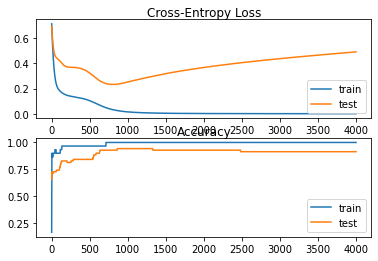

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

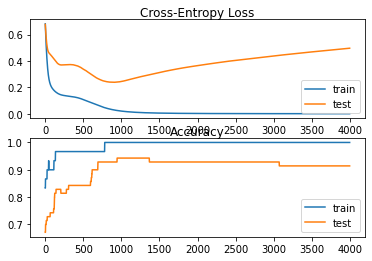

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Overfit MLP With Weight Constraint

We can update the example to use a weight constraint. There are a few different weight constraints to choose from. A good simple constraint for this model is to normalize the weights so that the norm equals 1.0. This constraint has the effect of forcing all incoming weights to be small. We can do this by using the unit norm in Keras. This constraint can be added to the first hidden layer as follows:

```
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
```

We can also achieve the same result by using the min-max norm and setting the min and maximum to 1.0, for example:

```
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))
```

We cannot achieve the same result with the maximum norm constraint as it will allow norms at or below the specified limit; for example:

```
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=max_norm(1.0)))
```

The complete updated example with the unit norm constraint is listed below:

In [16]:
# mlp overfit on the moons dataset with a unit norm constraint
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import unit_norm
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.943


Running the example reports the model performance on the train and test datasets. We can see that, indeed, the strict constraint on the size of the weights has improved the model's performance on the holdout set without impacting performance on the training set.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

Reviewing the line plot of train and test loss and accuracy, we can see that it no longer appears that the model has overfitted the training dataset. Model accuracy on both the train and test sets continues to improve to a plateau.

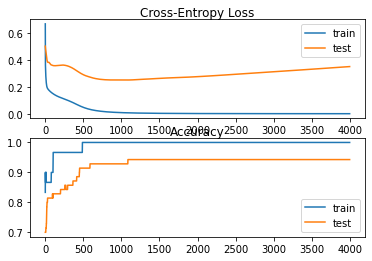

In [17]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Report Weight Norm**. Update the example to calculate the magnitude of the unit weights and demonstrate that the constraint indeed made the magnitude smaller.
* **Constrain Output Layer**. Update the example to add a constraint to the output layer of the model and compare the results.
* **Constrain Bias**. Update the example to add a constraint to the bias weight and compare the results.
* **Repeated Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.

## Summary

In this tutorial, you discovered the use of weight constraint regularization as an alternative to weight penalties to reduce overfitting in deep neural networks. Specifically, you learned:

* Weight penalties encourage but do not require neural networks to have small weights.
* Weight constraints such as the L2 norm and maximum norm can be used to force neural networks to have small weights during training.
* Weight constraints can improve generalization when used in conjunction with other regularization methods, like dropout.